# Walmart 

Walmart is a multinational retail corporation, one of the world's largest companies by revenue. It operates a chain of hypermarkets, discount department stores, and grocery stores.
Founded by Sam Walton in 1962 and incorporated on October 31, 1969, Walmart has grown into a global retail giant with a significant presence in various countries worldwide. Walmart is known for its vast network of stores, competitive pricing, and a wide range of products, including groceries, clothing, electronics, and household items.

In [1]:
# Importing major libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r'C:\Users\Aastha\Desktop\data\Walmart.xlsx - Walmart.csv')

In [3]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,6/13/2013,6/17/2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,9/30/2013,10/4/2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,2/27/2014,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,2/27/2014,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,2/27/2014,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32


In [4]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


######  Dealing with null values 

In [6]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

- We have no null values in this data 

In [7]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


- Above table gives us the statistical summary of all the numerical columns of our dataset

In [8]:
df.duplicated().sum()

0

- Our dataset is free of duplicated values 


#### Our first task is to find profit in different categories both positive and negative profit margins

In [9]:
P = df.groupby("Category").Profit.sum()

In [10]:
P

Category
Accessories    16484.62
Appliances      8261.29
Art             2374.15
Binders        16096.78
Bookcases      -1646.50
Chairs          4027.62
Copiers        19327.25
Envelopes       1908.71
Fasteners        275.19
Furnishings     7641.26
Labels          2303.07
Machines        -618.95
Paper          12119.10
Phones          9111.06
Storage         8645.49
Supplies         626.11
Tables          1482.54
Name: Profit, dtype: float64

In [11]:
profit = pd.DataFrame(P)
profit


,Profit
Category,
Accessories,16484.62
Appliances,8261.29
Art,2374.15
Binders,16096.78
Bookcases,-1646.50
Chairs,4027.62
Copiers,19327.25
Envelopes,1908.71
Fasteners,275.19


In [12]:
profit.value_counts().sum()

17

In [13]:
profit_positive = profit[profit.Profit>0]
profit_positive.Profit.sort_values(ascending = False)

Category
Copiers        19327.25
Accessories    16484.62
Binders        16096.78
Paper          12119.10
Phones          9111.06
Storage         8645.49
Appliances      8261.29
Furnishings     7641.26
Chairs          4027.62
Art             2374.15
Labels          2303.07
Envelopes       1908.71
Tables          1482.54
Supplies         626.11
Fasteners        275.19
Name: Profit, dtype: float64

In [14]:
profit_negative = profit[profit.Profit<0]
profit_negative.Profit.sort_values(ascending = False)

Category
Machines     -618.95
Bookcases   -1646.50
Name: Profit, dtype: float64

- We can clearly see that **copiers , Accessories and Binders** are top 3 products bringing most of the profit to the company whereas **Machines and bookcases** profit margins are in negative 

### Top ten Percent customers 

In [15]:
top_customer = df[df.Sales>0]
top_customer.Sales.sort_values(ascending = False)


2663    13999.96
799      8187.65
2846     5083.96
1913     4912.59
1319     4799.98
          ...   
2309        1.34
1995        1.19
295         1.08
1576        1.08
879         0.99
Name: Sales, Length: 3203, dtype: float64

In [16]:
valued_customer= df[df.Sales>0].sort_values(by="Sales",ascending = False).head(int((10*3203)/100))
valued_customer

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
2663,CA-2014-140151,3/24/2014,3/26/2014,Raymond Buch,United States,Seattle,Washington,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4.0,6719.98
799,CA-2011-143917,7/25/2011,7/27/2011,Ken Lonsdale,United States,San Francisco,California,Supplies,High Speed Automatic Electric Letter Opener,8187.65,5.0,327.51
2846,CA-2014-135909,10/14/2014,10/21/2014,Jane Waco,United States,Sacramento,California,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.96,5.0,1906.49
1913,CA-2013-136301,3/14/2013,3/16/2013,Edward Hooks,United States,San Francisco,California,Supplies,High Speed Automatic Electric Letter Opener,4912.59,3.0,196.50
1319,CA-2014-149881,4/2/2014,4/4/2014,Nick Crebassa,United States,San Francisco,California,Machines,Cubify CubeX 3D Printer Double Head Print,4799.98,2.0,360.00
...,...,...,...,...,...,...,...,...,...,...,...,...
398,CA-2013-145919,12/19/2013,12/24/2013,Henry Goldwyn,United States,Los Angeles,California,Supplies,Premier Electric Letter Opener,579.30,5.0,28.97
1472,CA-2014-130141,10/23/2014,10/25/2014,Helen Abelman,United States,Fort Collins,Colorado,Chairs,Office Star - Ergonomic Mid Back Chair with 2-...,579.14,4.0,-28.96
1947,CA-2011-140732,11/11/2011,11/13/2011,Matt Abelman,United States,Los Angeles,California,Phones,Mophie Juice Pack Helium for iPhone,575.93,9.0,57.59
1383,CA-2011-153983,11/29/2011,12/6/2011,Alan Hwang,United States,San Francisco,California,Phones,Wilson SignalBoost 841262 DB PRO Amplifier Kit,575.92,2.0,71.99


- The above dataset shows the top 10% of customers contributing to sales.
- Highest Profit  margin being 6719.98

######  Common characteristics of our top 10% customers

In [17]:
df1 = valued_customer.groupby(["Category", "Product Name"]).agg({"Profit": "sum"}).reset_index()
df1 = pd.DataFrame(df1)
df1

,Category,Product Name,Profit
0,Accessories,Imation Bio 2GB USBÂ Flash Drive ImationÂ Corp,440.76
1,Accessories,Imation Bio 8GB USBÂ Flash Drive ImationÂ Corp,224.42
2,Accessories,Logitech G19 Programmable Gaming Keyboard,200.86
3,Accessories,Logitech G700s Rechargeable Gaming Mouse,377.96
4,Accessories,LogitechÂ P710e Mobile Speakerphone,1418.78
...,...,...,...
204,Tables,Hon Practical Foundations 30 x 60 Training Tab...,250.31
205,Tables,Hon Racetrack Conference Tables,165.38
206,Tables,Laminate Occasional Tables,-32.37
207,Tables,"Lesro Round Back Collection Coffee Table, End ...",213.59


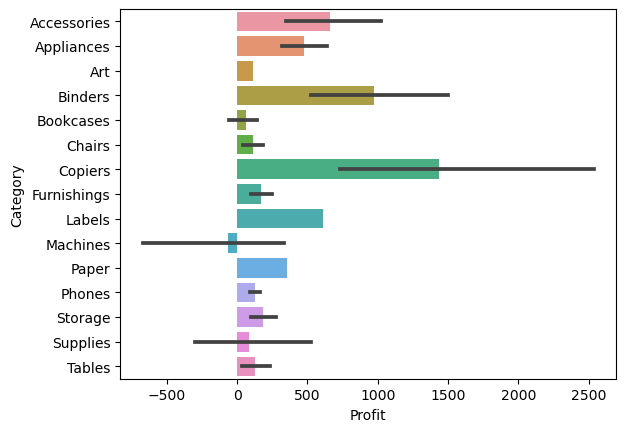

In [18]:
sns.barplot(data=df1, y="Category", x="Profit")
plt.show()

- The above graph shows the products top customers bought and we can see that both positive and negative profit margin categories are present


#### Sales  revenue over the time 

In [19]:
df['Order Date'] = pd.to_datetime(df["Order Date"], errors = "coerce", format = "%m/%d/%Y")
df["month"] = df["Order Date"].dt.month
df["year"] = df["Order Date"].dt.year

In [20]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,month,year
0,CA-2013-138688,2013-06-13,6/17/2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6,2013
1,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6,2011
2,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6,2011
3,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6,2011
4,CA-2011-115812,2011-06-09,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,10/4/2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,9,2013
3199,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,2,2014
3200,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,2,2014
3201,CA-2014-121258,2014-02-27,3/4/2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,2,2014


In [21]:
tempdf = df.groupby(["year", "month"])[["Sales","Profit"]].sum().reset_index()
tempdf

,year,month,Sales,Profit
0,2011,1,2648.05,20.97
1,2011,2,1348.64,228.82
2,2011,3,11008.91,1534.24
3,2011,4,9343.49,1629.45
4,2011,5,6570.44,873.57
5,2011,6,9629.41,1771.84
6,2011,7,21808.55,1946.69
7,2011,8,13248.24,2560.85
8,2011,9,14900.55,3075.50
9,2011,10,8728.75,1391.28


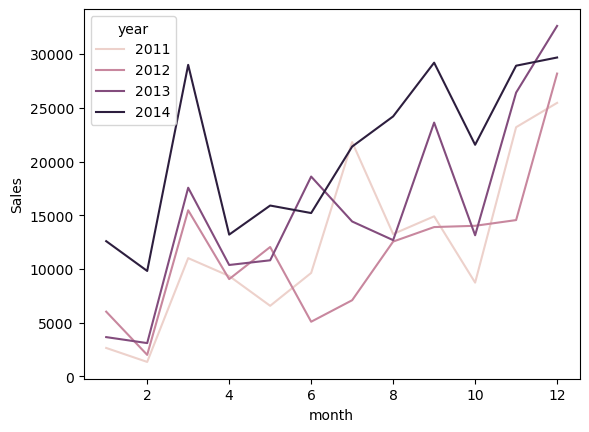

In [22]:
sns.lineplot(x=tempdf.month,y=tempdf.Sales,hue = tempdf.year )
plt.show()

#### Average time taken to ship orders 


In [23]:
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors = "coerce", format = "%m/%d/%Y")
df['Order Date'] = pd.to_datetime(df["Order Date"], errors = "coerce", format = "%m/%d/%Y")

In [24]:
df["Days"] = df["Ship Date"] - df["Order Date"]

In [25]:
df

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,month,year,Days
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6,2013,4 days
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6,2011,5 days
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6,2011,5 days
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6,2011,5 days
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6,2011,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,CA-2013-125794,2013-09-30,2013-10-04,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22,9,2013,4 days
3199,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63,2,2014,5 days
3200,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39,2,2014,5 days
3201,CA-2014-121258,2014-02-27,2014-03-04,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32,2,2014,5 days


In [26]:
df.Days.mean()

Timedelta('3 days 22:19:17.664689353')

- Average time taken to deliver order are 3 days 

In [27]:
tempdf1 = df.groupby(["City","days","Category"]).agg({"Quantity":"sum"}).reset_index()
tempdf1

KeyError: 'days'

In [ ]:
sns.lineplot(x=tempdf1.Category,y=tempdf1.days, errorbar = None)
plt.xticks(rotation = 90)
plt.show()

#### Most Profitable products 

In [ ]:
profit_positive = profit[profit.Profit>0]
profit_positive.Profit.sort_values(ascending = False)

In [ ]:
profit_positive.head(10)

- Above dataset shows the top 10 profitable products 

#### Top 5 cities in terms of total sales revenue 

In [ ]:
tempdf2 = df.groupby(["City"]).agg({'Sales':'sum', 'Customer Name':'nunique'}).sort_values(by="Sales",ascending=False).reset_index().head(5)
tempdf2

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x=tempdf2["Customer Name"],y=tempdf2.Sales , hue=tempdf2.City)
plt.xlabel("Customer Count")
plt.show()


- The top 5 city in Terms of sales revenue are Los Angeles, Seattle, San Francisco, San Diego and Denver